# Libraries

In [1]:
# Dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline

# Models
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix, classification_report

# Plot
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from collections import Counter

# Dataset

In [2]:
# Load dataset
dataset = load_breast_cancer()

X = dataset["data"][:,:]
target = dataset["target"] # to get the labels
feature_names = dataset["feature_names"][:]

print(f"X: {X.shape}")
print(f"Target: {target.shape}")

print("The features are:")
for i in range(len(feature_names)):
    print(feature_names[i])

X: (569, 30)
Target: (569,)
The features are:
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


In [3]:
#mean concave points (7)
#texture error(11)

In [4]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Data Exploration
# 1. Missing Values

In [5]:
# Check if missing values are present
nan_values = np.isnan(X)
#print(nan_values)

nan_count = np.count_nonzero(nan_values)
if nan_count != 0:
    if nan_count == 1:
        print(f"There is {nan_count} missing value")
    else:
        print(f"There are {nan_count} missing values")
else:
    print(f"There are no missing values")
    print(f"nan_count: {nan_count}")

There are no missing values
nan_count: 0


# 2. Class Distribution 

In [6]:
# Count how many benign and malignant 
label, counts = np.unique(target, return_counts=True)
class_distribution = dict(zip(label, counts))
print(f"Class distribution is: {class_distribution}")

Class distribution is: {0: 212, 1: 357}


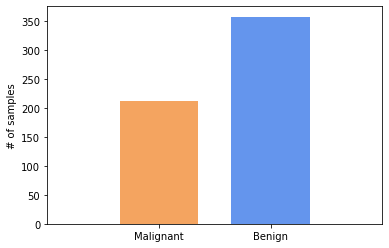

In [7]:
# Plot class distribution
x = ["Malignant", "Benign"]
x_pos = [0.1, 0.2]
y = [class_distribution[0], class_distribution[1]]
#plt.bar(x_pos, height = y, color = ["sandybrown", "cornflowerblue"], width = 0.07, alpha = 0.8)
plt.bar(x_pos, height = y, color = ["sandybrown", "cornflowerblue"], width = 0.07)
plt.xlim(0, 0.3)
#plt.title("Class distribution")
plt.xticks([0.1, 0.2], x)
plt.ylabel("# of samples")
#plt.grid(linewidth = "0.7")
plt.show()

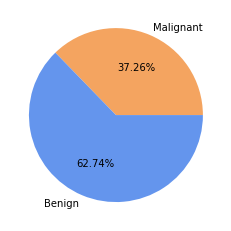

In [8]:
values = [class_distribution[0], class_distribution[1]]
lab = "Malignant", "Benign"
#plt.title("Class distribution")
plt.pie(values, labels = lab, colors = ["sandybrown", "cornflowerblue"], autopct = "%1.2f%%")
plt.show()

# 3. Statistics 

In [9]:
# Create a dataframe
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

# Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# 4. Boxplots

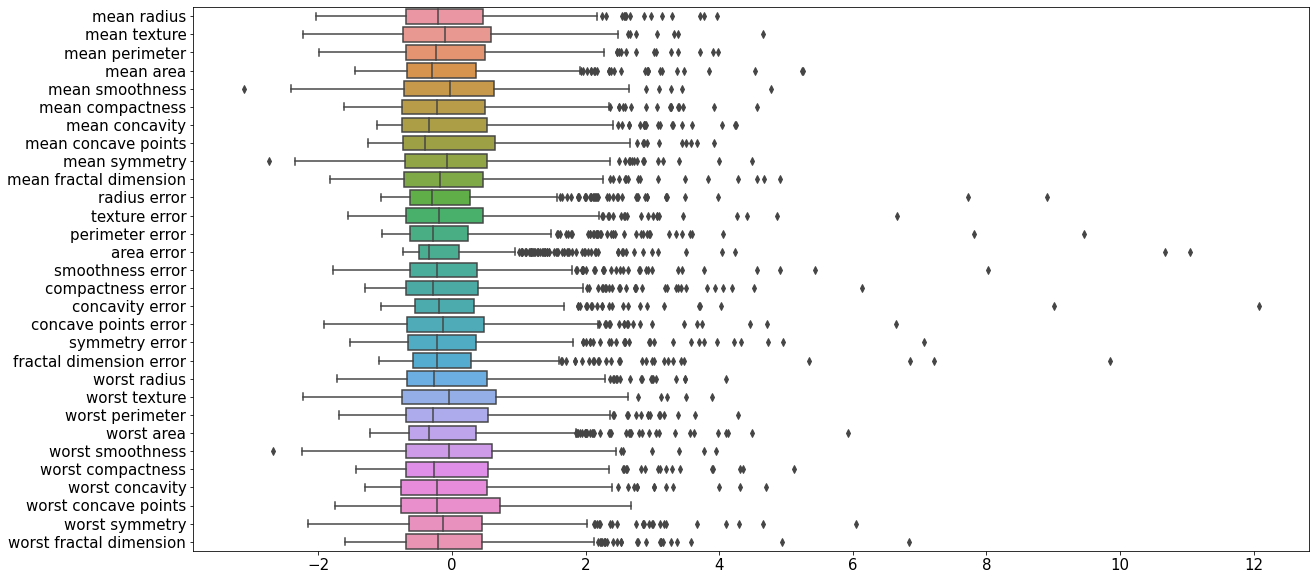

In [10]:
NORMALIZATION = True # True or False

# Boxplot of all attributes without normalization
if NORMALIZATION == False:
    fig = plt.figure(1, figsize = (20, 10))
    ax = fig.add_subplot(111)
    sns.boxplot(data = df, orient = "h")
    plt.yticks(np.arange(0, len(feature_names)), labels = feature_names, fontsize = 15)  
    plt.xticks(fontsize = 15)
    #plt.title("Boxplot of the attributes without normalization", fontsize = 40)
else:
    # Boxplot of all attributes with normalization

    # Normalization
    scaler = StandardScaler()
    df_scaler = scaler.fit_transform(df)

    # Plot
    fig = plt.figure(1, figsize = (20, 10))
    ax = fig.add_subplot(111)
    sns.boxplot(data = df_scaler[:, :], orient = "h")
    plt.yticks(np.arange(0, len(feature_names)), labels = feature_names, fontsize = 15)  
    plt.xticks(fontsize = 15)
    #plt.title("Boxplot of the attributes after normalization", fontsize = 40)

plt.show()

# 5. Histograms

In [11]:
# Concatenate X and target
X_target = np.c_[X, target] # add a column
print(f"New dimension is: {X_target.shape}")

New dimension is: (569, 31)


In [12]:
# Divide benign and malignant
mal = np.where(X_target[:, 30] == 0)
ben = np.where(X_target[:, 30] == 1)
malignant = X_target[mal]
benign = X_target[ben]

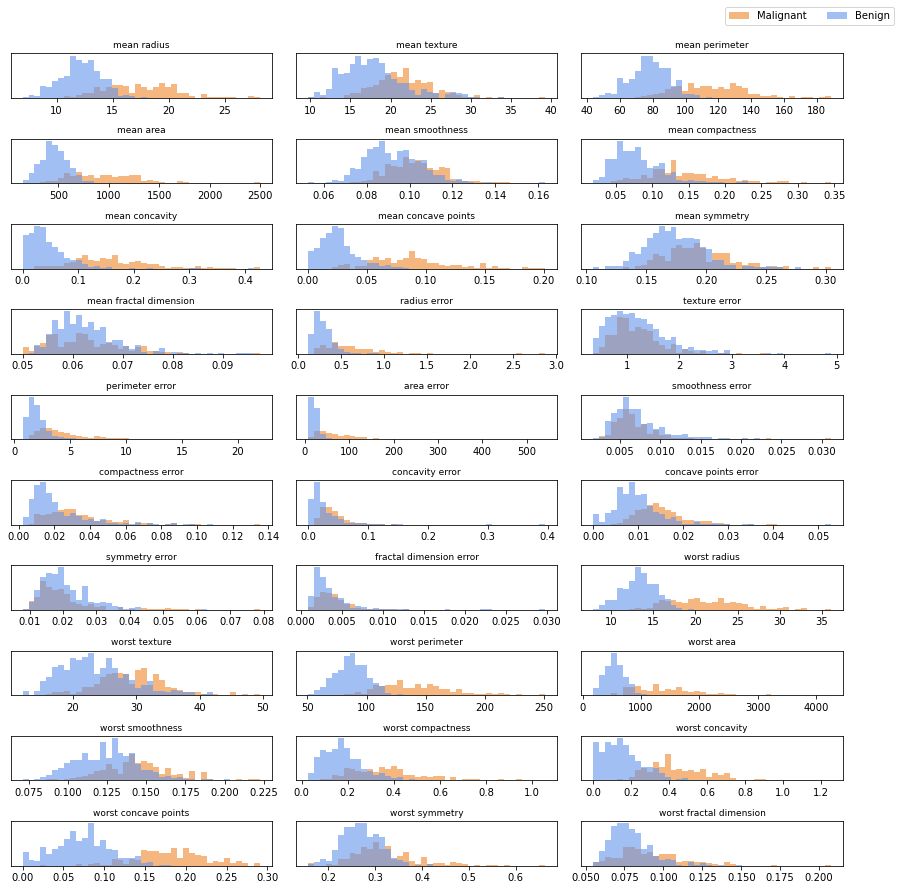

In [13]:
# Histogram plots
fig, axes = plt.subplots(10, 3, figsize = (12, 12))
ax = axes.ravel()
labels = ["Malignant", "Benign"]

for i in range(len(feature_names)):
    _,bins = np.histogram(X[:,i], bins = 40)
    ax[i].hist(malignant[:,i], bins = bins, color = "sandybrown", alpha = 0.8) # malignant class
    ax[i].hist(benign[:,i], bins = bins, color = "cornflowerblue", alpha = 0.6) # benign class
    # alpha is for transparency in the overlapped region
    ax[i].set_title(feature_names[i], fontsize = 9)
    ax[i].axes.get_xaxis().set_visible(True)
    ax[i].set_yticks(())
    #ax[i].grid(linewidth = "0.7")

fig.legend(labels, loc = "lower right", bbox_to_anchor = (1.05, 1), ncol = len(labels), bbox_transform = fig.transFigure)
plt.tight_layout()
plt.show()

# 6. Correlation Matrix

In [14]:
# Create a dataframe
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

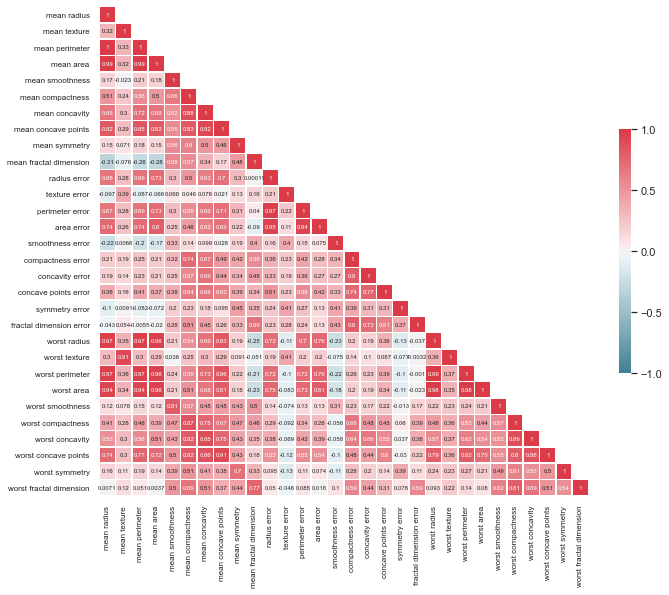

In [15]:
# Plot correlation matrix
sns.set(style = "white", font_scale = 1)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool), +1)

fig, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
ax = sns.heatmap(corr, mask = mask, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = 0.5, cmap = cmap, cbar_kws = {"shrink": 0.5}, annot = True, annot_kws = {"size": 6})
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

# 7. Distribution of correlated features

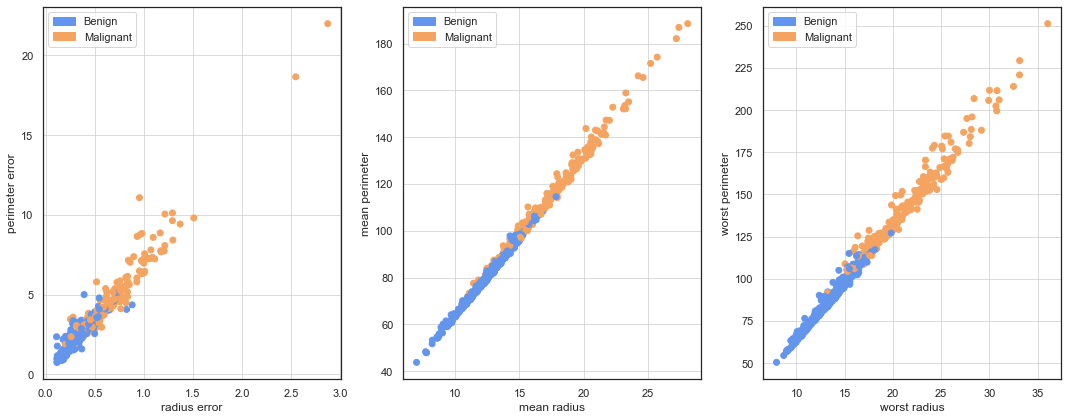

In [16]:
# Positive correlated features from correlation matrix
index = np.where(feature_names == "perimeter error")
perimeter_error = X[:, index]

index = np.where(feature_names == "radius error")
radius_error = X[:, index]

index = np.where(feature_names == "mean perimeter")
mean_perimeter = X[:, index]

index = np.where(feature_names == "mean radius")
mean_radius = X[:, index]

index = np.where(feature_names == "worst perimeter")
worst_perimeter = X[:, index]

index = np.where(feature_names == "worst radius")
worst_radius = X[:, index]


fig, ax = plt.subplots(1, 3, figsize = (15, 6))

labels = ["Benign", "Malignant"]
patch_ben = mpatches.Patch(color = "cornflowerblue", label = "Benign")
patch_mal = mpatches.Patch(color = "sandybrown", label = "Malignant")
#colors = ["cornflowerblue", "sandybrown"]
colors = ["sandybrown", "cornflowerblue"]

ax[0].scatter(radius_error, perimeter_error, c = target, cmap = matplotlib.colors.ListedColormap(colors), label = labels)
ax[0].grid(linewidth = "0.7")
ax[0].set_xlabel("radius error")
ax[0].set_ylabel("perimeter error")
ax[0].legend(handles = [patch_ben, patch_mal])
ax[1].scatter(mean_radius, mean_perimeter, c = target, cmap = matplotlib.colors.ListedColormap(colors))
ax[1].grid(linewidth = "0.7")
ax[1].set_xlabel("mean radius")
ax[1].set_ylabel("mean perimeter")
ax[1].legend(handles = [patch_ben, patch_mal])
ax[2].scatter(worst_radius, worst_perimeter, c = target, cmap = matplotlib.colors.ListedColormap(colors))
ax[2].grid(linewidth = "0.7")
ax[2].set_xlabel("worst radius")
ax[2].set_ylabel("worst perimeter")
ax[2].legend(handles = [patch_ben, patch_mal])

plt.tight_layout()
plt.show()

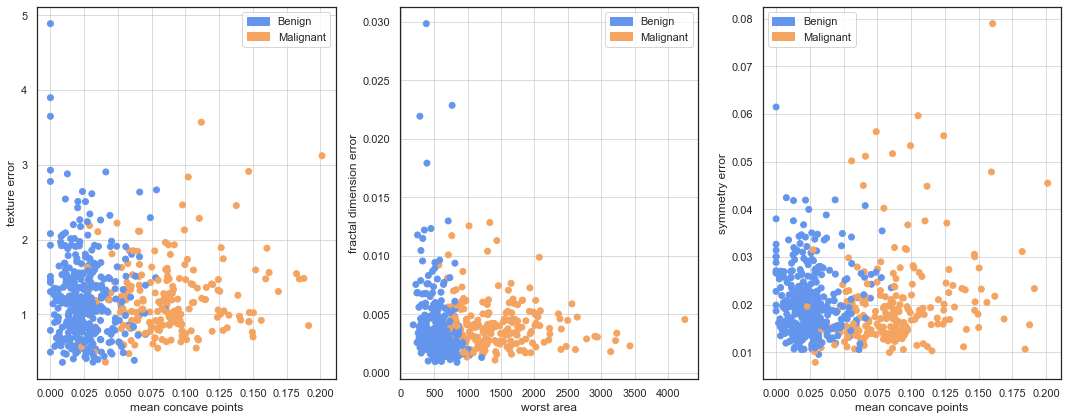

In [17]:
# Not correlated

index = np.where(feature_names == "texture error")
texture_error = X[:, index]

index = np.where(feature_names == "mean concave points")
mean_concave_points = X[:, index]

index = np.where(feature_names == "worst area")
worst_area = X[:, index]

index = np.where(feature_names == "fractal dimension error")
fractal_dimension_error = X[:, index]

index = np.where(feature_names == "symmetry error")
symmetry_error = X[:, index]

index = np.where(feature_names == "mean concave points")
mean_concave_points = X[:, index]

fig, ax = plt.subplots(1,3, figsize= (15, 6))

labels = ["Benign", "Malignant"]
patch_ben = mpatches.Patch(color = "cornflowerblue", label = "Benign")
patch_mal = mpatches.Patch(color = "sandybrown", label = "Malignant")
#colors = ["cornflowerblue", "sandybrown"]
colors = ["sandybrown", "cornflowerblue"]

ax[0].scatter(mean_concave_points, texture_error, c = target, cmap = matplotlib.colors.ListedColormap(colors), label = labels)
ax[0].grid(linewidth = "0.7")
ax[0].set_xlabel("mean concave points")
ax[0].set_ylabel("texture error")
ax[0].legend(handles = [patch_ben, patch_mal])
ax[1].scatter(worst_area, fractal_dimension_error, c = target, cmap = matplotlib.colors.ListedColormap(colors))
ax[1].grid(linewidth = "0.7")
ax[1].set_xlabel("worst area")
ax[1].set_ylabel("fractal dimension error")
ax[1].legend(handles = [patch_ben, patch_mal])
ax[2].scatter(mean_concave_points, symmetry_error, c = target, cmap = matplotlib.colors.ListedColormap(colors))
ax[2].grid(linewidth = "0.7")
ax[2].set_xlabel("mean concave points")
ax[2].set_ylabel("symmetry error")
ax[2].legend(handles = [patch_ben, patch_mal])

plt.tight_layout()
plt.show()

# Pipeline

In [18]:
# Feature selection 
FEATURE_SELECTION = True # True or False

# PCA
APPLY_PCA = False

# SMOTE
APPLY_SMOTE = False

# Train-test split

In [19]:
#df

In [20]:
new_X = df.to_numpy() 
X_train, X_test, Y_train, Y_test = train_test_split(new_X, target, test_size = 1/3, random_state = 42, stratify = target)

In [21]:
print(np.shape(X_train))
print(np.shape(X_test))


print(len(Y_train[Y_train == 0])) # count 0
print(len(Y_train[Y_train == 1])) # count 1

print(len(Y_test[Y_test == 0]))
print(len(Y_test[Y_test == 1]))

(379, 30)
(190, 30)
141
238
71
119


In [22]:
#X_train

# Feature selection

In [23]:
# SOME COUPLES OF FEATURES STRONLGY CORRELATED AND THEIR PEARSON COEFFICIENT

# feature selection
if FEATURE_SELECTION: # True or False

    # X_train in df
    df = pd.DataFrame(X_train, columns = dataset.feature_names)

    # X_test
    df_test = pd.DataFrame(X_test, columns = dataset.feature_names)

    df_target = df.assign(target = Y_train) # Y_train
    corr = df_target.corr() # method = "pearson"

    c = corr.abs().unstack()
    c.sort_values(ascending = False, inplace = True)
    col_above_94 = [(col1, col2, c[col1, col2]) for col1, col2 in c.index if c[col1, col2] > 0.94 and col1 != col2]
    print(col_above_94)

[('mean perimeter', 'mean radius', 0.9977928671504434), ('mean radius', 'mean perimeter', 0.9977928671504434), ('worst radius', 'worst perimeter', 0.9933045100547631), ('worst perimeter', 'worst radius', 0.9933045100547631), ('mean radius', 'mean area', 0.9904309294760252), ('mean area', 'mean radius', 0.9904309294760252), ('mean perimeter', 'mean area', 0.9890948964012258), ('mean area', 'mean perimeter', 0.9890948964012258), ('worst area', 'worst radius', 0.9857090271545276), ('worst radius', 'worst area', 0.9857090271545276), ('worst perimeter', 'worst area', 0.9778222270026719), ('worst area', 'worst perimeter', 0.9778222270026719), ('worst radius', 'mean area', 0.9754419937387055), ('mean area', 'worst radius', 0.9754419937387055), ('worst perimeter', 'mean perimeter', 0.9750852333709386), ('mean perimeter', 'worst perimeter', 0.9750852333709386), ('worst radius', 'mean radius', 0.974644869933267), ('mean radius', 'worst radius', 0.974644869933267), ('mean perimeter', 'worst radiu

In [24]:
# FEATURES CORRELATION TO THE TARGET VARIABLE

if FEATURE_SELECTION:
    corr_target = abs(corr["target"])

    #selecting highly correlated features 
    relevant_features = corr_target[corr_target > 0.3]
    relevant_features.sort_values(ascending = False)

In [25]:
if FEATURE_SELECTION:
    to_drop = []
    for i in range(len(col_above_94)):
        feature1 = col_above_94[i][0]
        feature2 = col_above_94[i][1]
        if corr_target[feature1] >= corr_target[feature2]:
            to_drop.append(feature2)
        else:
            to_drop.append(feature1)

    to_drop = set(to_drop) # eliminate
    print(to_drop)
    
    df_target = df_target.drop(df_target[to_drop], axis = 1)
    # droppare da df (train)
    df = df.drop(df[to_drop], axis = 1)
    
    # e trasformarlo in X_train
    X_train = df.to_numpy()
    
    # droppare da df_test
    df_test = df_test.drop(df_test[to_drop], axis = 1)
    
    # e trasformarlo in X_test
    X_test = df_test.to_numpy()
    
    new_features = list(df.columns)

{'perimeter error', 'mean radius', 'worst area', 'mean area', 'mean perimeter', 'worst radius', 'radius error'}


# Normalization

In [26]:
"""sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)""" # **

'sc = StandardScaler()\nsc.fit(X_train)\n\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)'

# Dimensionality Reduction

In [27]:
#APPLY_PCA = True # True or False
"""
if APPLY_PCA:
    pca = PCA(random_state = 2020) # to plot all principal components
    #pca = PCA(n_components = 7, random_state = 2020)
    pca.fit(X_train)
    
    score = pca.fit_transform(X_train)
    
    X_test = pca.transform(X_test)
    
    print(pca.explained_variance_ratio_)
    components = len(pca.explained_variance_ratio_)
    print("Number of principal components:", components)
    
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
    print("Total variance explained", cum_var_exp)
    
    # Plot explained variances
    
    fig = plt.figure(1, figsize = (10, 6))
    plt.bar(range(0, components), height = pca.explained_variance_ratio_, alpha = 0.5, align = "center")
    plt.plot(range(0, components), cum_var_exp, marker = "o",  label = "Cumulative PVE")
    plt.ylabel("Proportion variance explained", fontsize = 10)
    plt.xlabel("Principal component index", fontsize = 10)
    plt.xticks(range(0, components), range(1, components + 1))
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    plt.legend(loc = "best")
    plt.grid(linewidth = "0.7")
    plt.show()"""

'\nif APPLY_PCA:\n    pca = PCA(random_state = 2020) # to plot all principal components\n    #pca = PCA(n_components = 7, random_state = 2020)\n    pca.fit(X_train)\n    \n    score = pca.fit_transform(X_train)\n    \n    X_test = pca.transform(X_test)\n    \n    print(pca.explained_variance_ratio_)\n    components = len(pca.explained_variance_ratio_)\n    print("Number of principal components:", components)\n    \n    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)\n    print("Total variance explained", cum_var_exp)\n    \n    # Plot explained variances\n    \n    fig = plt.figure(1, figsize = (10, 6))\n    plt.bar(range(0, components), height = pca.explained_variance_ratio_, alpha = 0.5, align = "center")\n    plt.plot(range(0, components), cum_var_exp, marker = "o",  label = "Cumulative PVE")\n    plt.ylabel("Proportion variance explained", fontsize = 10)\n    plt.xlabel("Principal component index", fontsize = 10)\n    plt.xticks(range(0, components), range(1, components + 1)

In [28]:
def biplot(score, coeff, pcax, pcay, Y_train, labels = None):
    pca1 = pcax-1
    pca2 = pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = score.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(1, figsize = (15, 10))
    
    classes = ["Benign", "Malignant"]
    patch_ben = mpatches.Patch(color = "cornflowerblue", label = "Benign")
    patch_mal = mpatches.Patch(color = "sandybrown", label = "Malignant")
    
    plt.scatter(xs*scalex, ys*scaley, c = Y_train, cmap = matplotlib.colors.ListedColormap(colors), label = classes)
    #plt.scatter(xs, ys, c = Y_train, cmap = matplotlib.colors.ListedColormap(colors), label = classes)
    plt.legend(handles = [patch_ben, patch_mal])
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], head_width = 10*0.001, color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-0.8, 0.8)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [29]:
"""
if APPLY_PCA:
    if FEATURE_SELECTION == False:
        biplot(score, pca.components_, 1, 2, Y_train, labels = feature_names)
    else:
        biplot(score, pca.components_, 1, 2, Y_train, labels = new_features)"""

'\nif APPLY_PCA:\n    if FEATURE_SELECTION == False:\n        biplot(score, pca.components_, 1, 2, Y_train, labels = feature_names)\n    else:\n        biplot(score, pca.components_, 1, 2, Y_train, labels = new_features)'

# SMOTE

In [30]:
"""sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

def plot_2d_data_points(X, y, labels):
    
    patch_ben = mpatches.Patch(color = "cornflowerblue", label = "Benign")
    patch_mal = mpatches.Patch(color = "sandybrown", label = "Malignant")
    colors = ["sandybrown", "cornflowerblue"]
    markers = ['o', 'o']
    
    #labels = ["Benign", "Malignant"]
    
    #ax[0].scatter(mean_concave_points, texture_error, c = target, cmap = matplotlib.colors.ListedColormap(colors), label = labels)
    
    for label, color, marker in zip(np.unique(y), colors, markers):
        if label == 0:
            lbl = "Malignant"
        else:
            lbl = "Benign"
        plt.scatter(X[y==label, 7], X[y==label, 11], c = color, label=lbl, marker=marker)
        
        #print(len(X[y==label, 0]))
        #print(len(X[y==label, 1]))
        #print(X[y==label, 0])
    plt.title(labels)
    plt.xlabel("mean concave poins") # feature 7
    plt.ylabel("texture error") # feature 11
    plt.legend(loc = "upper right", handles = [patch_ben, patch_mal])
    plt.grid(linewidth = "0.7")
    plt.show()"""

'sc = StandardScaler()\nsc.fit(X_train)\n\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)\n\ndef plot_2d_data_points(X, y, labels):\n    \n    patch_ben = mpatches.Patch(color = "cornflowerblue", label = "Benign")\n    patch_mal = mpatches.Patch(color = "sandybrown", label = "Malignant")\n    colors = ["sandybrown", "cornflowerblue"]\n    markers = [\'o\', \'o\']\n    \n    #labels = ["Benign", "Malignant"]\n    \n    #ax[0].scatter(mean_concave_points, texture_error, c = target, cmap = matplotlib.colors.ListedColormap(colors), label = labels)\n    \n    for label, color, marker in zip(np.unique(y), colors, markers):\n        if label == 0:\n            lbl = "Malignant"\n        else:\n            lbl = "Benign"\n        plt.scatter(X[y==label, 7], X[y==label, 11], c = color, label=lbl, marker=marker)\n        \n        #print(len(X[y==label, 0]))\n        #print(len(X[y==label, 1]))\n        #print(X[y==label, 0])\n    plt.title(labels)\n    plt.xlabel("mean concave p

In [31]:
#plot_2d_data_points(X_train, Y_train, "Without SMOTE")

In [32]:
"""smote = SMOTE(random_state = 42)
print(Counter(Y_train))
X_train, Y_train = smote.fit_resample(X_train, Y_train)
print(Counter(Y_train))
plot_2d_data_points(X_train, Y_train, "With SMOTE")"""

'smote = SMOTE(random_state = 42)\nprint(Counter(Y_train))\nX_train, Y_train = smote.fit_resample(X_train, Y_train)\nprint(Counter(Y_train))\nplot_2d_data_points(X_train, Y_train, "With SMOTE")'

# Train and Validation
# Stratified K-Fold Cross Validation

In [33]:
ALGORITHM = "SVM" # "RandomForest", "SVM", "KNN"

In [34]:
# SMOTE
"""APPLY_OVERSAMPLING = False # True or False
if APPLY_OVERSAMPLING:
    smote = SMOTE(random_state = 42)
    X_train, Y_train = smote.fit_resample(X_train, Y_train)"""

'APPLY_OVERSAMPLING = False # True or False\nif APPLY_OVERSAMPLING:\n    smote = SMOTE(random_state = 42)\n    X_train, Y_train = smote.fit_resample(X_train, Y_train)'

In [35]:
# Pipeline
if ALGORITHM == "SVM" : 
    # Support Vector Machine (SVM) classifier
    parameter_grid = {
      "C": [0.0001, 0.001, 0.1, 1, 10, 100],
      "kernel": ["linear","rbf", "poly"],
      "gamma": [0.0001, 0.001, 0.01]
    }
    clf_name = 'svc__'
    classifier = SVC() # or SVC
    
elif ALGORITHM == "RandomForest":
    # Random Forest classifier
    parameter_grid = {
      "criterion": ["gini", "entropy"],
      "max_features": ["sqrt", "log2"],
      #"oob_score": [True],
      "n_estimators": [10, 50, 100, 200], 
      "max_depth": [None, 5, 10, 20, 25]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
    
elif ALGORITHM == "KNN":
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors": [3, 5, 10, 20, 30, 50, 100], 
        "weights": ["uniform", "distance"],
        "p":[1,2]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else:
    raise RuntimeError("Choose a correct classifier");

In [36]:
new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

NUM_COMPONENTS = 7 # For PCA
if APPLY_PCA:
    if APPLY_SMOTE:
        my_pipeline = make_pipeline(StandardScaler(), PCA(n_components = NUM_COMPONENTS, whiten = True, random_state = 2020), SMOTE(random_state = 42), classifier)
    else:
        my_pipeline = make_pipeline(StandardScaler(), PCA(n_components = NUM_COMPONENTS, whiten = True, random_state = 2020), classifier)
else:
    if APPLY_SMOTE:
        my_pipeline = make_pipeline(StandardScaler(), SMOTE(random_state = 42), classifier)
    else:
        my_pipeline = make_pipeline(StandardScaler(), classifier)


In [37]:
new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [38]:
SCORE = "f1" # "accuracy", "precision", "recall", "f1"

#grid = GridSearchCV(imba_pipeline, param_grid = new_params, cv = kf, scoring = SCORE, return_train_score = True)
#grid = GridSearchCV(classifier, param_grid = new_params, cv = kf, scoring = SCORE, return_train_score = True)

grid = GridSearchCV(my_pipeline, param_grid = new_params, cv = kf, scoring = SCORE, return_train_score = True)

grid.fit(X_train, Y_train)
print(f"Best configuration found for {classifier}:")
print(grid.best_params_)
print(f"Val {SCORE}:   {grid.best_score_}")

Best configuration found for SVC():
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Val f1:   0.9756633626089751


# Results

0.9842105263157894 0.9874476987447698 0.9833333333333333 0.9915966386554622

              precision    recall  f1-score   support

           0      0.986     0.972     0.979        71
           1      0.983     0.992     0.987       119

    accuracy                          0.984       190
   macro avg      0.985     0.982     0.983       190
weighted avg      0.984     0.984     0.984       190

Best configuration found for SVC():
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


c:\users\paola\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


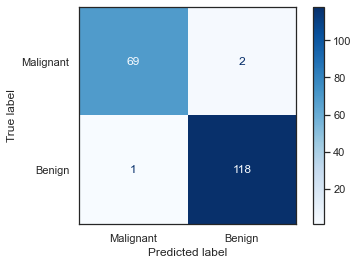

In [39]:
# retrain with best params

#new_model = SVC(**grid.best_params_)
#new_model.fit(X_train, Y_train)
#y_pred = new_model.predict(X_test)

y_pred = grid.predict(X_test)
report = classification_report(Y_test, y_pred, digits = 3)

accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

print(accuracy, f1, precision, recall)
print(f"")

#print(classification_report())

disp = plot_confusion_matrix(grid, X_test, Y_test,
                                 display_labels = ["Malignant", "Benign"],
                                 cmap = plt.cm.Blues, 
                                 #display_labels = data.target_names, 
                                 normalize = None) # None or true

#disp.ax_.set_title(f"normalized confusion matrix {clf_name}")
print(report)

print(f"Best configuration found for {classifier}:")
print(grid.best_params_)

In [40]:
# Baseline, fs, pca, smote, fs + pca, fs + smote, pca + smote, fs + pca + smote
RF_results = { "pipeline": ["Baseline", "FS", "PCA", "SMOTE", "FS+PCA", "FS+SMOTE", "PCA+SMOTE", "FS+PCA+SMOTE"],
              "f1_score": [0.949, 0.966, 0.955, 0.944, 0.943, 0.966, 0.955, 0.950],
              "recall": [0.945, 0.961, 0.955, 0.944, 0.941, 0.963, 0.958, 0.951],
              "accuracy": [0.953, 0.968, 0.958, 0.947, 0.947, 0.968, 0.958, 0.953],
              "criterion": ["entropy", "entropy", "entropy", "entropy", "entropy", "gini", "entropy", "gini"],
              "max_depth": [20, "None", 20, 10, "None", "None", 10, 10], 
              "max_features": ["sqrt", "log2", "sqrt", "log2", "log2", "sqrt", "sqrt", "sqrt"],
              "n_estimators": [200, 200, 200, 200, 100, 100, 50, 100]  
}
RF_results_df = pd.DataFrame(RF_results)

SVM_results = { "pipeline": ["Baseline", "FS", "PCA", "SMOTE", "FS+PCA", "FS+SMOTE", "PCA+SMOTE", "FS+PCA+SMOTE"],
              "f1_score": [0.977, 0.983, 0.960, 0.972, 0.966, 0.983, 0.961, 0.972],
              "recall": [0.975, 0.982, 0.956, 0.970, 0.961, 0.982, 0.962, 0.970],
              "accuracy": [0.979, 0.984, 0.963, 0.974, 0.968, 0.984, 0.963, 0.974],
              "C": [100, 100, 100, 1, 100, 0.1, 10, 0.1],
              "kernel": ["rbf", "rbf", "rbf", "rbf", "rbf", "linear", "rbf", "linear"],
              "gamma": [0.001, 0.001, 0.001, 0.01, 0.001, "None", 0.01, "None"] 
}
SVM_results_df = pd.DataFrame(SVM_results)

KNN_results = { "pipeline": ["Baseline", "FS", "PCA", "SMOTE", "FS+PCA", "FS+SMOTE", "PCA+SMOTE", "FS+PCA+SMOTE"],
              "f1_score": [0.954, 0.966, 0.966, 0.966, 0.972, 0.934, 0.955, 0.938],
              "recall": [0.949, 0.961, 0.963, 0.963, 0.970, 0.941, 0.952, 0.940],
              "accuracy": [0.958, 0.968, 0.968, 0.968, 0.974, 0.937, 0.958, 0.942],
              "n_neighbors": [5, 10, 3, 5, 5, 10, 100, 30],
              "weights": ["uniform", "uniform", "uniform", "uniform", "uniform", "uniform", "uniform", "uniform"],
              "distance":["manhattan", "manhattan", "euclidean", "euclidean", "manhattan", "manhattan", "manhattan", "euclidean"]
} 
#"p":[1, 1, 2, 2, 1, 1, 1, 2]
KNN_results_df = pd.DataFrame(KNN_results)

In [41]:
RF_results_df

,pipeline,f1_score,recall,accuracy,criterion,max_depth,max_features,n_estimators
0,Baseline,0.949,0.945,0.953,entropy,20,sqrt,200
1,FS,0.966,0.961,0.968,entropy,None,log2,200
2,PCA,0.955,0.955,0.958,entropy,20,sqrt,200
3,SMOTE,0.944,0.944,0.947,entropy,10,log2,200
4,FS+PCA,0.943,0.941,0.947,entropy,None,log2,100
5,FS+SMOTE,0.966,0.963,0.968,gini,None,sqrt,100
6,PCA+SMOTE,0.955,0.958,0.958,entropy,10,sqrt,50
7,FS+PCA+SMOTE,0.950,0.951,0.953,gini,10,sqrt,100


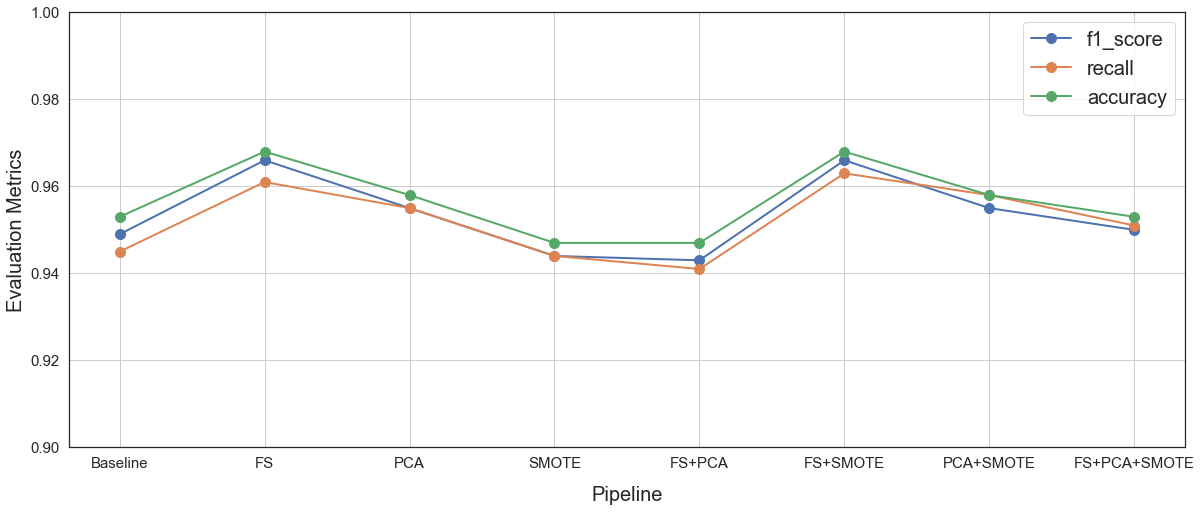

In [42]:
RF_df = pd.DataFrame({
   "f1_score": [0.949, 0.966, 0.955, 0.944, 0.943, 0.966, 0.955, 0.950],
   "recall": [0.945, 0.961, 0.955, 0.944, 0.941, 0.963, 0.958, 0.951],
   "accuracy": [0.953, 0.968, 0.958, 0.947, 0.947, 0.968, 0.958, 0.953]
   }, index = ["Baseline", "FS", "PCA", "SMOTE", "FS+PCA", "FS+SMOTE", "PCA+SMOTE", "FS+PCA+SMOTE"])



f = plt.figure(figsize=(20,8))
plt.plot(RF_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Pipeline",size=20,labelpad=15)
plt.ylabel("Evaluation Metrics",size=20)
plt.ylim(0.90, 1)
plt.legend(RF_df,prop={'size': 20})
plt.show()

In [43]:
SVM_results_df

,pipeline,f1_score,recall,accuracy,C,kernel,gamma
0,Baseline,0.977,0.975,0.979,100.0,rbf,0.001
1,FS,0.983,0.982,0.984,100.0,rbf,0.001
2,PCA,0.960,0.956,0.963,100.0,rbf,0.001
3,SMOTE,0.972,0.970,0.974,1.0,rbf,0.01
4,FS+PCA,0.966,0.961,0.968,100.0,rbf,0.001
5,FS+SMOTE,0.983,0.982,0.984,0.1,linear,None
6,PCA+SMOTE,0.961,0.962,0.963,10.0,rbf,0.01
7,FS+PCA+SMOTE,0.972,0.970,0.974,0.1,linear,None


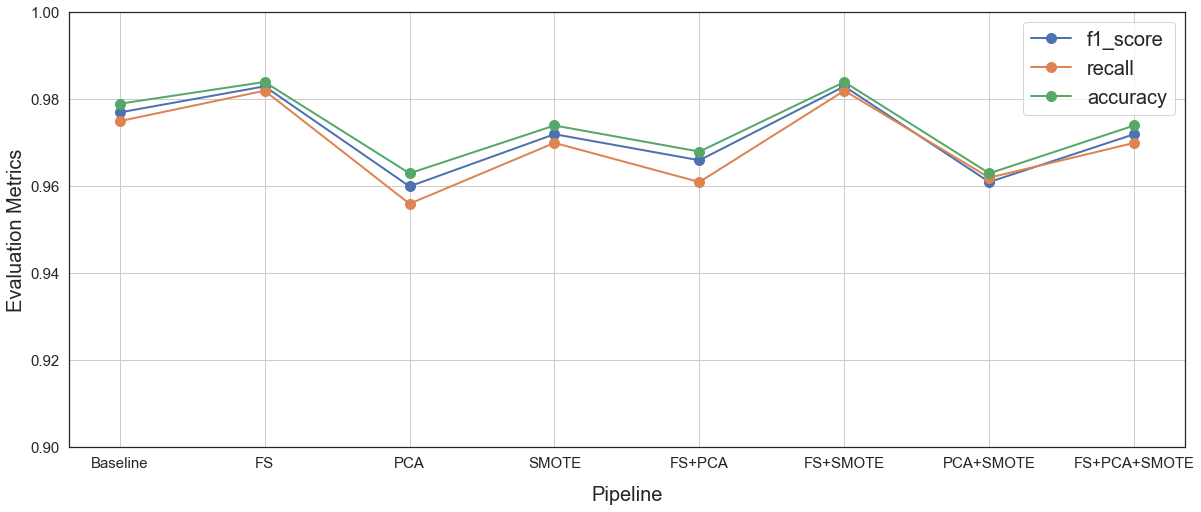

In [44]:
SVM_df = pd.DataFrame({
   "f1_score": [0.977, 0.983, 0.960, 0.972, 0.966, 0.983, 0.961, 0.972],
   "recall": [0.975, 0.982, 0.956, 0.970, 0.961, 0.982, 0.962, 0.970],
   "accuracy": [0.979, 0.984, 0.963, 0.974, 0.968, 0.984, 0.963, 0.974]
   }, index = ["Baseline", "FS", "PCA", "SMOTE", "FS+PCA", "FS+SMOTE", "PCA+SMOTE", "FS+PCA+SMOTE"])



f = plt.figure(figsize=(20,8))
plt.plot(SVM_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Pipeline",size=20,labelpad=15)
plt.ylabel("Evaluation Metrics",size=20)
plt.ylim(0.90, 1)
plt.legend(SVM_df,prop={'size': 20})
plt.show()

In [45]:
KNN_results_df

,pipeline,f1_score,recall,accuracy,n_neighbors,weights,distance
0,Baseline,0.954,0.949,0.958,5,uniform,manhattan
1,FS,0.966,0.961,0.968,10,uniform,manhattan
2,PCA,0.966,0.963,0.968,3,uniform,euclidean
3,SMOTE,0.966,0.963,0.968,5,uniform,euclidean
4,FS+PCA,0.972,0.970,0.974,5,uniform,manhattan
5,FS+SMOTE,0.934,0.941,0.937,10,uniform,manhattan
6,PCA+SMOTE,0.955,0.952,0.958,100,uniform,manhattan
7,FS+PCA+SMOTE,0.938,0.940,0.942,30,uniform,euclidean


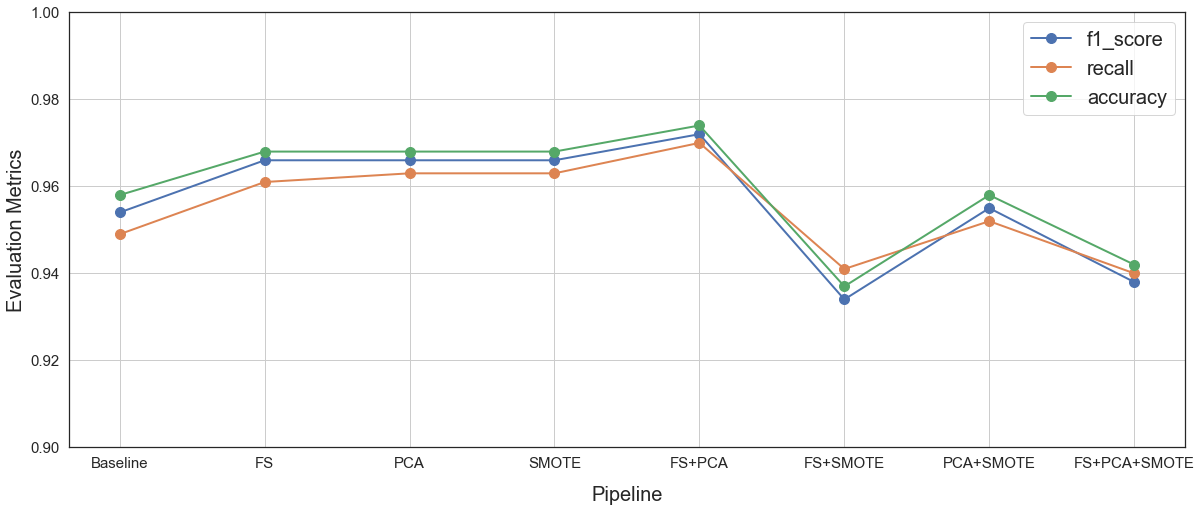

In [46]:
KNN_df = pd.DataFrame({
   "f1_score": [0.954, 0.966, 0.966, 0.966, 0.972, 0.934, 0.955, 0.938],
   "recall": [0.949, 0.961, 0.963, 0.963, 0.970, 0.941, 0.952, 0.940],
   "accuracy": [0.958, 0.968, 0.968, 0.968, 0.974, 0.937, 0.958, 0.942]
   }, index = ["Baseline", "FS", "PCA", "SMOTE", "FS+PCA", "FS+SMOTE", "PCA+SMOTE", "FS+PCA+SMOTE"])
#KNN_df.plot(kind='line')


f = plt.figure(figsize=(20,8))
plt.plot(KNN_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Pipeline",size=20,labelpad=15)
plt.ylabel("Evaluation Metrics",size=20)
plt.ylim(0.9, 1)
plt.legend(KNN_df,prop={'size': 20})
plt.show()